# ДЗ 3
## Выберите ряд из первого задания и постройте его модель ARIMA. Отчет нужно будет оформить в jupyter-ноутбук.
## Дополнительное задание: попробуйте спрогнозировать график классическим ML

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

## Применим модель ARIMA

### Возьмем ряд по месячным продажам машин в Квебеке

In [5]:
series = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")['Count']

In [8]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)
warnings.filterwarnings("ignore")

i:   0%|          | 0/12 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

aic: 1902.62315 | order: (10, 2, 4)
Results of Dickey-Fuller Test:
Test Statistic                -9.861604e+00
p-value                        4.218704e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64


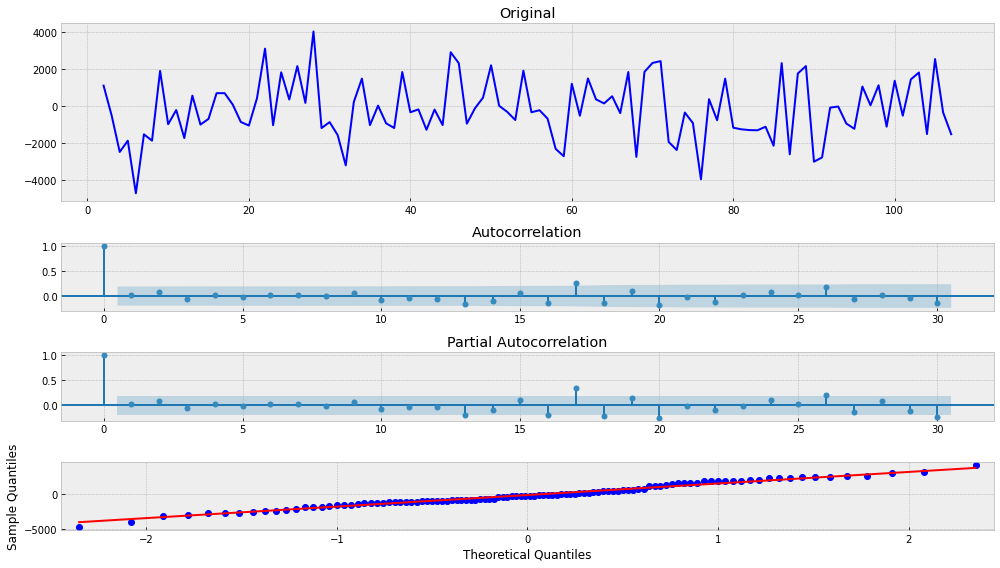

In [24]:
# Подберем лучшие параметры для модели ARIMA
best_aic = np.inf 
best_order = None
best_mdl = None

for i in tqdm(range(12), "i"):
    for d in tqdm(range(4), "d", leave = False):
        for j in tqdm(range(5), "j", leave = False):
            try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

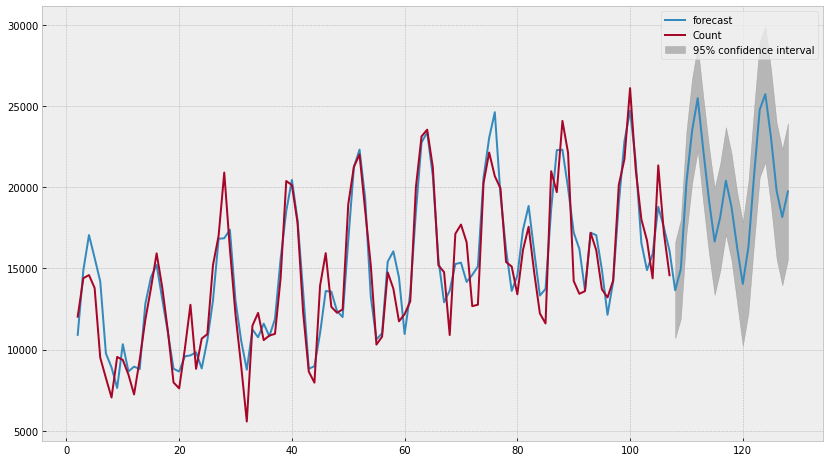

In [35]:
# Построим Прогноз на 20 периодов
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    best_mdl.plot_predict(2, len(series)+20, ax=ax)
    #plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()

### Модель хорошо прогнозирует ряд

## Применим модель GARCH

In [37]:
from arch import arch_model

In [103]:

series_g = boxcox(series, 0)
#series_g = series_g[12:] - series_g[:-12]
series_g = series_g[1:] - series_g[:-1]

# Гиперпараметры возьмем из модели ARIMA
p_ = 10
o_ = 2
q_ = 4


am = arch_model(series_g, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())


                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                5.44819
Distribution:      Standardized Student's t   AIC:                           27.1036
Method:                  Maximum Likelihood   BIC:                           77.8874
                                              No. Observations:                  107
Date:                      Fri, Jun 04 2021   Df Residuals:                      106
Time:                              11:11:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

## Попробуем спрогнозировать график классическим ML

Генерируем большое количество фичей для нашего временного ряда

In [107]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):
    
    data = pd.DataFrame(data.copy())
    
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))
    
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.Count.shift(i)
        
    data = data.dropna()
    data = data.reset_index(drop=True)
    #data = data.drop(["Month"], axis=1)
     
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["Count"], axis=1)
    y_train = data.loc[:test_index]["Count"]
    X_test = data.loc[test_index:].drop(["Count"], axis=1)
    y_test = data.loc[test_index:]["Count"]
    
    return X_train, X_test, y_train, y_test

In [108]:
X_train, X_test, y_train, y_test = prepareData(series, lag_start=1, lag_end=20, test_size=0.3)

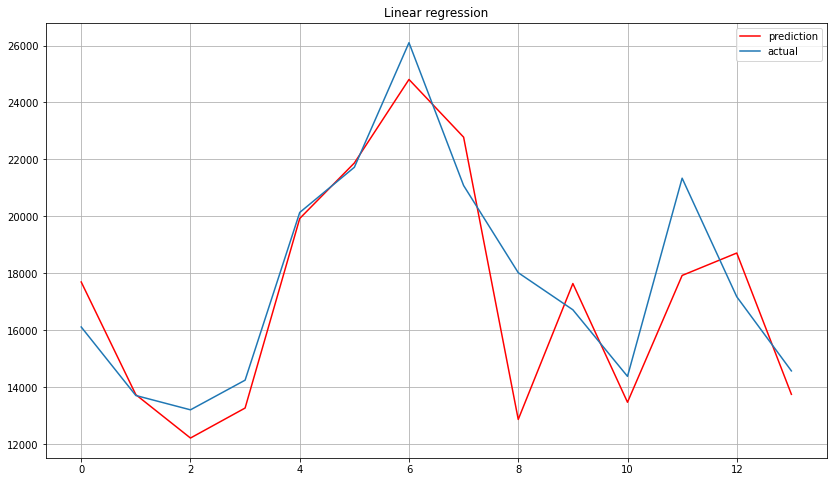

In [109]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True);

### Классическая модель неплохо предсказывыает тестовые данные